## Logistic Regression

In [17]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.special import expit # Expit is another name for Sigmoid

In [10]:
# Create the values for X
X = [x for x in range(1,51)]

X = np.array(X)
X = X[:, np.newaxis]

In [11]:
# Create the values for y

# Create values from X then any value below mean is 0 and above mean is 1
y = (X > X.mean())  # boolean
y = y.astype(int)   # convert boolean to binary

In [12]:
# Do train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=9)

In [14]:
# (1) Flatten X_Test to sort its values in ascending order and
# (2) put it back into multidimensional array
X_test = np.sort(X_test.ravel())
X_test = X_test[:, np.newaxis]

In [16]:
# Instantiate the model
model_logistic = LogisticRegression()

# Learn the parameters (beta_0 and beta_1)
model_logistic.fit(X_train, y_train.ravel())

LogisticRegression()

In [18]:
# Extract beta_0 and beta_1 from the model
beta_0 = model_logistic.intercept_
beta_1 = model_logistic.coef_

In [19]:
# Put the parameters of the model inside Expit (Sigmoid)
y_hat = expit(beta_0 + beta_1 * X_test)

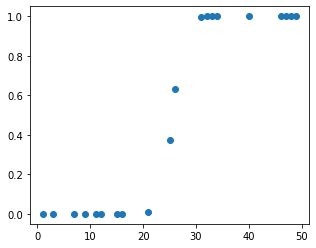

In [23]:
plt.figure(1, figsize=(5,4))
plt.scatter(X_test, y_hat)

In [25]:
# Print the parameters
print(beta_0)
print(beta_1)

[-27.10046239]
[[1.06310375]]


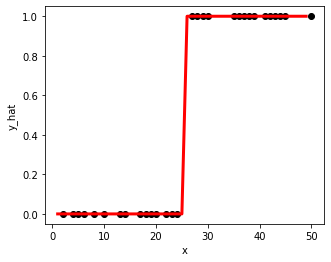

In [54]:
plt.figure(2, figsize=(5,4))
plt.scatter(X_train, y_train.ravel(), color="black")

y_hat_test = model_logistic.predict(X_test)
plt.plot(X_test, y_hat_test, color="red", linewidth=3)

plt.ylabel("y_hat")
plt.xlabel("x")
plt.show()

In [55]:
from sklearn.metrics import classification_report

confusion_matrix = classification_report(y_test, y_hat_test, target_names=['Class 0', 'Class 1'])
print(confusion_matrix)

              precision    recall  f1-score   support

     Class 0       0.50      0.50      0.50        10
     Class 1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20

